<a href="https://colab.research.google.com/github/adinavale/github-slideshow/blob/master/Copy_of_Luminoth_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Luminoth Object Detection Tutorial

The following is an object detection tutorial using Tensorflow 1.5 and the package by Tryolabs called Luminoth. For more information, please reference the docs here: https://luminoth.readthedocs.io/en/latest/usage/quickstart.html

First lets install the necessary packages

In [3]:
!pip install luminoth
!pip install tensorflow==1.5

Now we are going to mount our google drive to access the files


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Lets print the GPU information and make sure we are running either a V100 or P100 GPU

In [6]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, 
and then re-execute this cell.


Lets move into the right folder

In [7]:
import os
# os.chdir("drive")
path = '/content/drive/My Drive/ML with Joe/Adi'
os.chdir(path)
os.getcwd()

'/content/drive/.shortcut-targets-by-id/1de7T-KXAttM0XuOB5l5iojyP29Ed1XQm/Adi'

Lets import a few of Joe's previously trained Drosophila object detectors

In [8]:
!lumi checkpoint refresh
!lumi checkpoint import c8345979ac98.tar
!lumi checkpoint import 6b3e4dff015f.tar

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:496: FutureWarning: Passing (type, 1) or 

Lets list all of the loaded checkpoints

In [9]:
!lumi checkpoint list

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:496: FutureWarning: Passing (type, 1) or 

LEts use each one of these checkpoints, (ssd and RCNN) to test their predictions on a never seen before image

In [10]:
!lumi predict test/DSC_0109.JPG --checkpoint c8345979ac98 > DSC_0109_RCNN.txt
!lumi predict test/DSC_0109.JPG --checkpoint 6b3e4dff015f > DSC_0109_SSD.txt

# !lumi predict test/DSC_0109.JPG --checkpoint e1c2565b51e9 > DSC_0109_RCNN.txt
# !lumi predict test/DSC_0109.JPG --checkpoint aad6912e94d9 > DSC_0109_SSD.txt

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:496: FutureWarning: Passing (type, 1) or 

KeyboardInterrupt: ignored

Now lets parse their results from a text file and display them below:

In [ ]:
with open("DSC_0109_RCNN.txt", "r") as dfile:
    data = dfile.readlines()
    print(data)
from ast import literal_eval
d = literal_eval(data[2:][0])

predictions = [bbox['bbox'] for bbox in d['objects']]
print(predictions) #x1,y1,x2,y2

import cv2  
from google.colab.patches import cv2_imshow
   
# Reading an image in default mode 
image = cv2.imread('test/DSC_0109.JPG') 
   
# Blue color in BGR 
color = (255, 0, 0) 
  
# Using cv2.rectangle() method 
# Draw a rectangle with blue line borders of thickness of 2 px 
for bbox in predictions:
    image = cv2.rectangle(image, (bbox[0], bbox[1]), (bbox[2], bbox[3]), color, 2) 

  
# Displaying the image  
cv2_imshow(image) 

[[1681, 682, 1711, 737], [1949, 1130, 1990, 1180], [1280, 678, 1309, 736], [1677, 1447, 1708, 1492], [1276, 1449, 1307, 1493], [1756, 983, 1777, 1044], [1013, 1130, 1053, 1184], [1201, 999, 1224, 1059]]


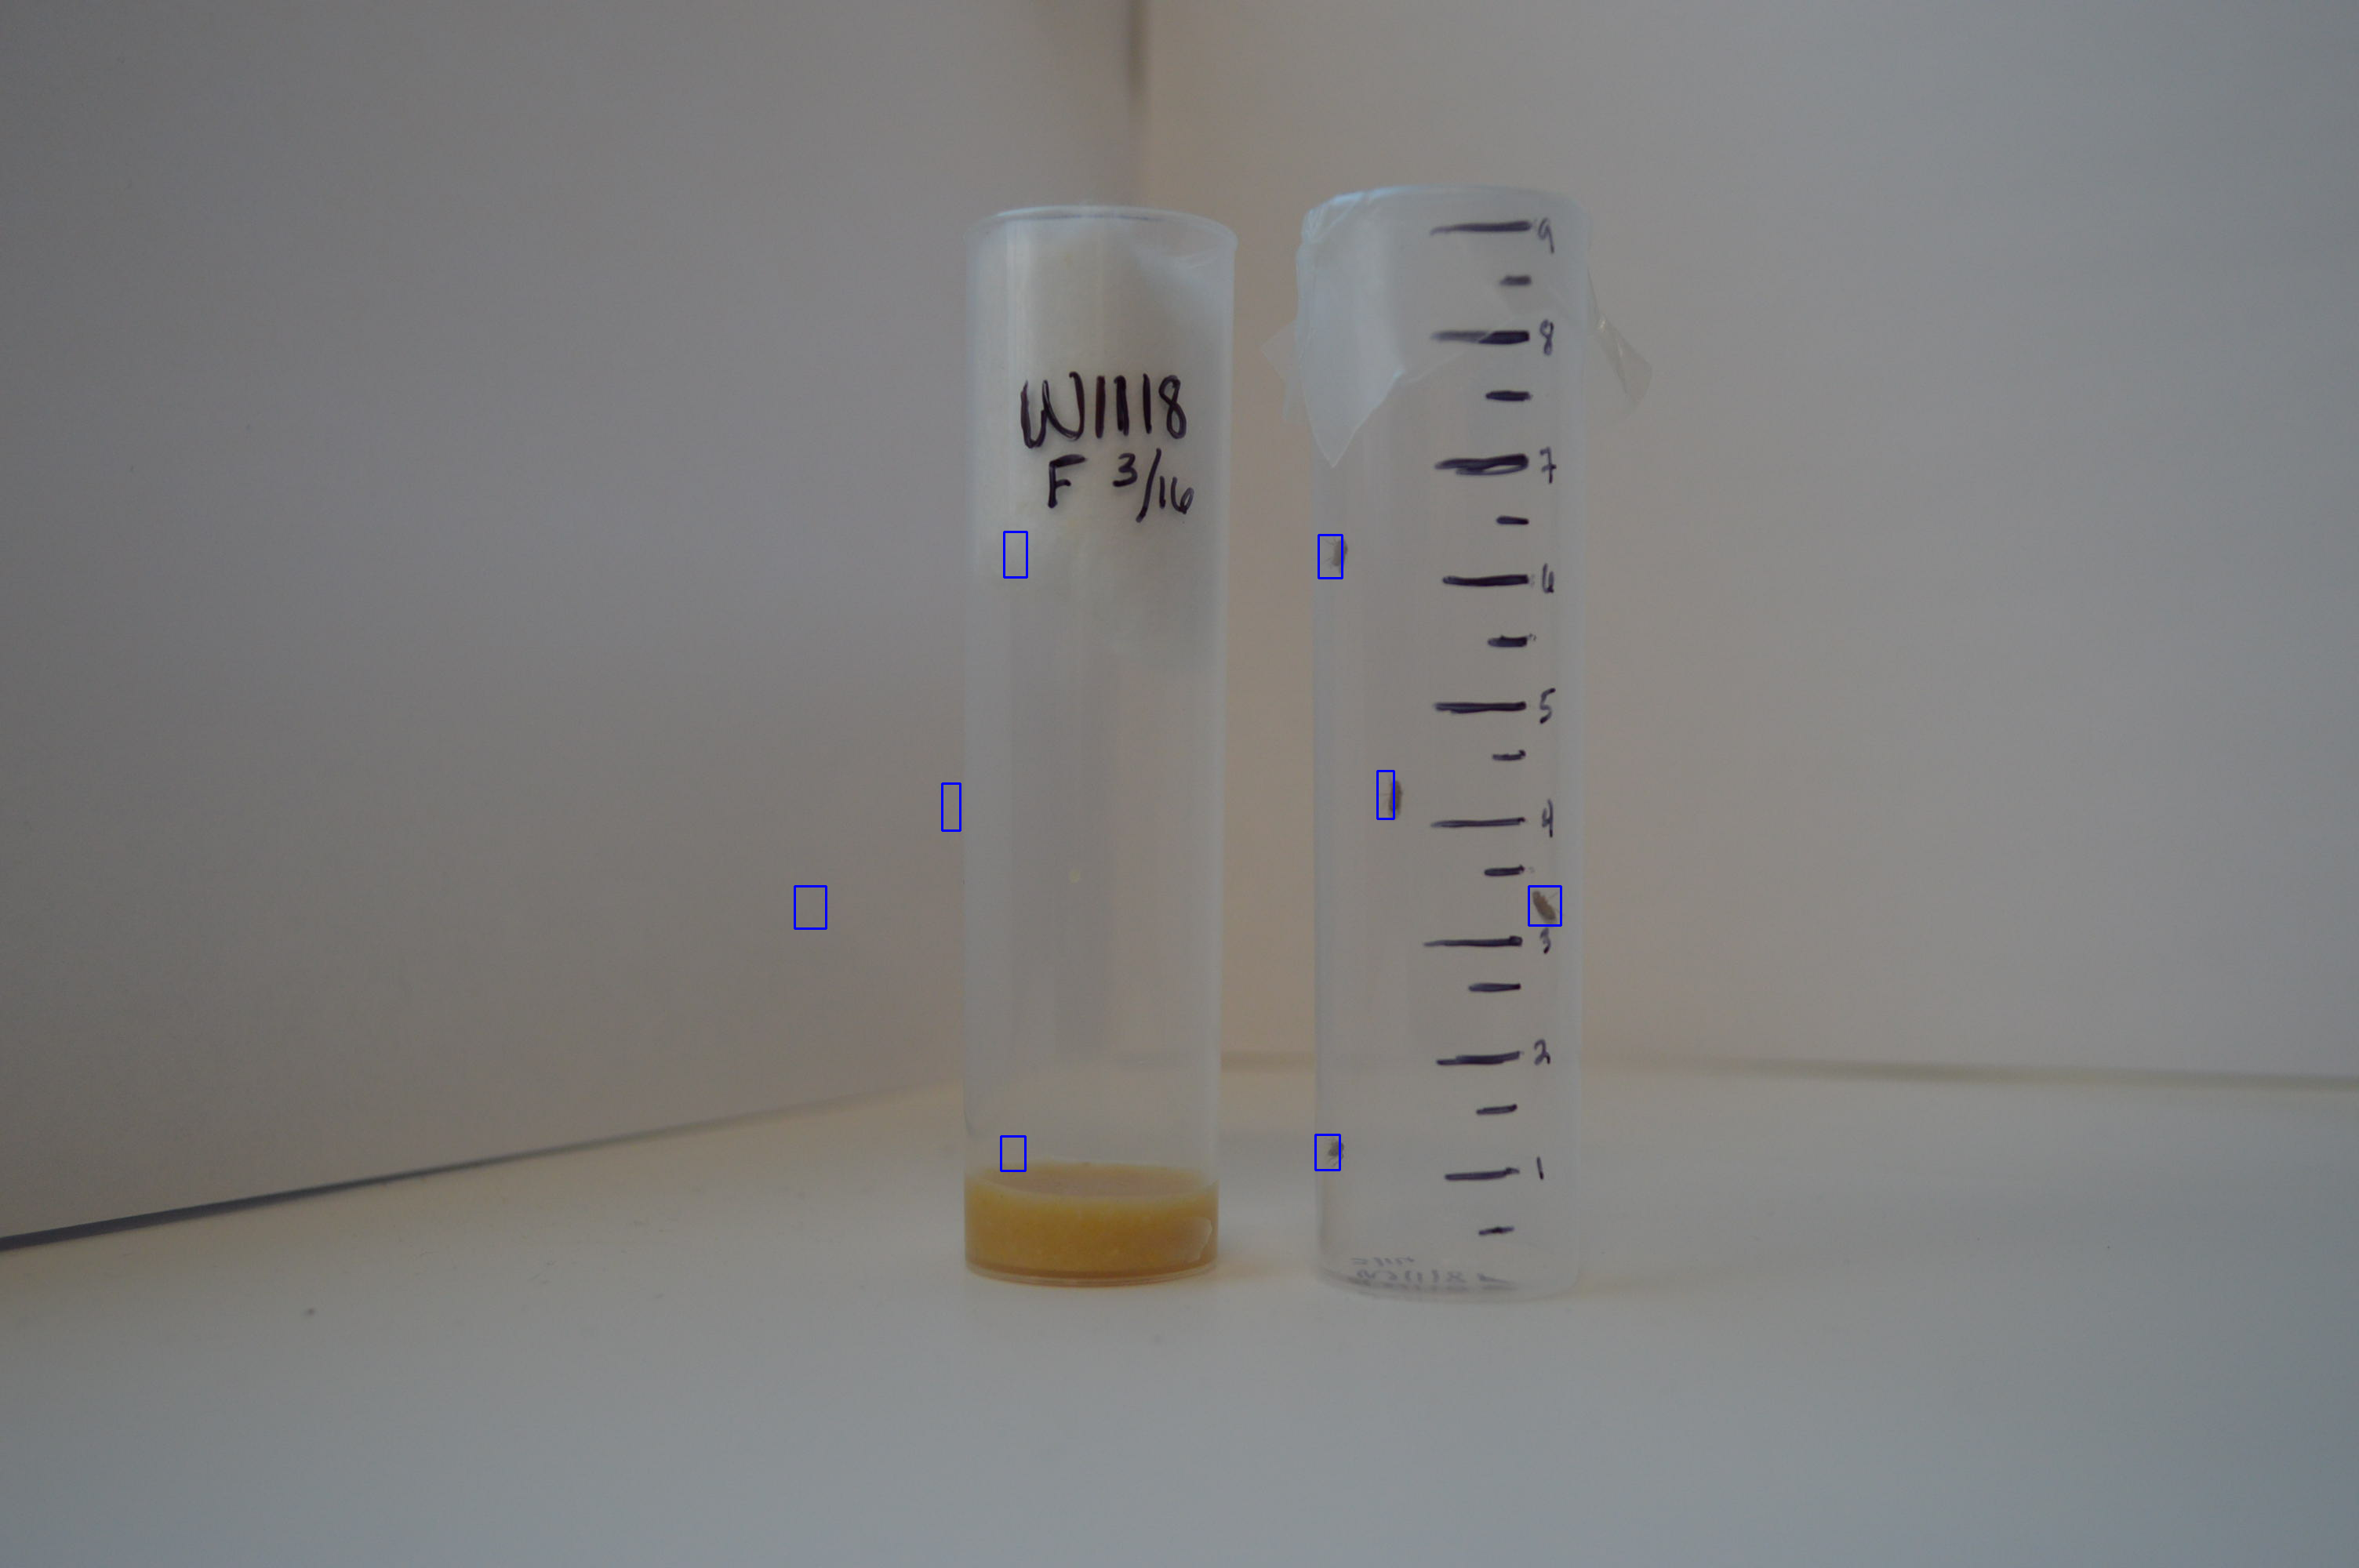

In [11]:
with open("DSC_0109_SSD.txt", "r") as dfile:
    data = dfile.readlines()

from ast import literal_eval
d = literal_eval(data[2:][0])

predictions = [bbox['bbox'] for bbox in d['objects']]
print(predictions) #x1,y1,x2,y2

import cv2  
from google.colab.patches import cv2_imshow
   
# Reading an image in default mode 
image = cv2.imread('test/DSC_0109.JPG') 
   
# Blue color in BGR 
color = (255, 0, 0) 
  
# Using cv2.rectangle() method 
# Draw a rectangle with blue line borders of thickness of 2 px 
for bbox in predictions:
    image = cv2.rectangle(image, (bbox[0], bbox[1]), (bbox[2], bbox[3]), color, 2) 

  
# Displaying the image  
cv2_imshow(image) 

#Training on our own files

In this next section, we will need to organize our files into the following format:

---flies --[

            --- folder with images
            --- csv file with annotations

Now lets start parsing the files that you created Adi! HEre we can parse all of the json files you labeled.

In [55]:
import os
import json
import cv2
from bs4 import BeautifulSoup

directory= '/content/drive/My Drive/ML with Joe/Adi/Annotations'

def convert_in_dir2(directory):
    os.chdir(directory)

    with open("{}.csv".format(directory), "w") as out_csv_file:

        for file_index, file in enumerate(os.listdir(os.getcwd())):
        #if the file ends with json
            if file.endswith(".json") or file.endswith(".JSON"):
                pass
            else:
                break
            
            #save the file name
            filename = str(file).replace(".json",".jpg")

            #open the json file
            with open(file) as f:
            #load it all into a variable
                image_annotations= json.load(f)

            #loop over all of the values in the json file
            for idx, value in enumerate(image_annotations.values()):
            #if the index is 2, then process it because it has all of the data points
                if idx == 2:
                #loop over each of the bounding boxes
                    for record_item in value:
        
                        #make minimums
                        if int(record_item['points'][0][0]) < int(record_item['points'][1][0]):
                            min_x = int(record_item['points'][0][0])
                            max_x = int(record_item['points'][1][0])
                        else:
                            min_x = int(record_item['points'][1][0])
                            max_x = int(record_item['points'][0][0])

                        if int(record_item['points'][0][1]) < int(record_item['points'][1][1]):
                            min_y = int(record_item['points'][0][1])
                            max_y = int(record_item['points'][1][1])
                        else:
                            min_y = int(record_item['points'][1][1])
                            max_y = int(record_item['points'][0][1])

                        out_csv_file.write(str(filename))
                        out_csv_file.write(",")
                        out_csv_file.write(str(min_x))
                        out_csv_file.write(",")
                        out_csv_file.write(str(min_y))
                        out_csv_file.write(",")
                        out_csv_file.write(str(max_x))
                        out_csv_file.write(",")
                        out_csv_file.write(str(max_y))
                        out_csv_file.write(",")
                        out_csv_file.write("Fly")
                        out_csv_file.write(",")
                        out_csv_file.write(str(file_index))
                        out_csv_file.write("\n")
    os.chdir("..")

if __name__ == '__main__':
    print(os.getcwd())
    # os.chdir("..")
    dataset_dicts = convert_in_dir2('/content/drive/My Drive/ML with Joe/Adi/Annotations')
    # os.chdir("..")
   

/content/drive/.shortcut-targets-by-id/1de7T-KXAttM0XuOB5l5iojyP29Ed1XQm/Adi


Now that we have parsed all of our json files, lets use the built in function in luminoth to convert this csv format into tfrecord format into a new directory called tf_records

In [58]:
# !lumi dataset transform --type csv --data-dir datasets/ --output-dir datasets/tf_records/ --split testing --only-classes=Fly 
!lumi dataset transform --type csv --data-dir '/content/drive/My Drive/ML with Joe/Adi' --output-dir datasets/tf_records/ --split test --only-classes=Fly 

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:496: FutureWarning: Passing (type, 1) or 

To start our training, luminoth requires a configuration file.  Lets use the ipython magic functions to write the config.yml file we need, specifying the SSD

In [59]:
%%writefile config.yml
train:
  # Name used to identify the run. Data inside `job_dir` will be stored under
  # `run_name`.
  run_name: fly-detector-SSD-adi
  # Base directory in which model checkpoints & summaries (for Tensorboard) will
  # be saved.
  job_dir: jobs/
  save_checkpoint_secs: 100
  save_summaries_secs: 100

  # Number of epochs (complete dataset batches) to run.
  num_epochs: 150000

dataset:
  type: object_detection
  # From which directory to read the dataset.
  dir: lumi/
  image_preprocessing:
    min_size: 600
    max_size: 1024
  data_augmentation:
    - flip:
        left_right: True
        up_down: True
        prob: 0.5

model:
  type: ssd
  network:
    num_classes: 1
  anchors:
    # Add one more scale to be better at detecting small objects
    scales: [0.125, 0.25, 0.5, 1, 2]

Overwriting config.yml


Now lets start the training! Since we are using an upgraded version of colab pro, we can have access to up to 24 hours of run time in a single sitting. We will train for 24 hours and stop the model training. 

In [ ]:
!lumi train -c config.yml

Need to stop this afer a certain number of epochs manually or just wait until it finishes

In [ ]:
!lumi checkpoint create config.yml -e name="Adi-flies-ssd" -e alias=Adi-flies-ssd

Now lets visualize our results

In [ ]:
from luminoth import Detector, read_image, vis_objects

image = read_image('test/DSC_0109.JPG')

# If no checkpoint specified, will assume `accurate` by default. In this case,
# we want to use our traffic checkpoint. The Detector can also take a config
# object.
detector = Detector(checkpoint='Adi-flies-ssd')

# Returns a dictionary with the detections.
objects = detector.predict(image)

print(objects)

vis_objects(image, objects).save('DSC_0109_ssd_predictions.png')

import cv2  
from google.colab.patches import cv2_imshow
   
# Reading an image in default mode 
image = cv2.imread('test/DSC_0109.JPG') 
   
# Blue color in BGR 
color = (255, 0, 0) 
  
# Using cv2.rectangle() method 
# Draw a rectangle with blue line borders of thickness of 2 px 
for bbox in predictions:
    image = cv2.rectangle(image, (bbox[0], bbox[1]), (bbox[2], bbox[3]), color, 2) 

  
# Displaying the image  
cv2_imshow(image) 

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:496: FutureWarning: Passing (type, 1) or 

Checkpoint not found. Check remote repository? [y/N]: y
Retrieving remote index... done.
No changes in remote index.
Checkpoint isn't available in remote repository either.


ValueError: ignored

The following code block has code to parse xml files with labels from a different labelling tool:

In [ ]:
# import xml.etree.ElementTree as ET
# import sys
# import os


# def read_content(xml_file):

#     tree = ET.parse(xml_file)
#     root = tree.getroot()

#     list_with_all_boxes = []

#     for boxes in root.iter('object'):

#         filename = root.find('filename').text

#         ymin, xmin, ymax, xmax = None, None, None, None

#         for box in boxes.findall("bndbox"):
#             ymin = int(box.find("ymin").text)
#             xmin = int(box.find("xmin").text)
#             ymax = int(box.find("ymax").text)
#             xmax = int(box.find("xmax").text)

#         list_with_single_boxes = [xmin, ymin, xmax, ymax]
#         list_with_all_boxes.append(list_with_single_boxes)

#     return filename, list_with_all_boxes

# def parse_directory(name_of_dir):
#     """parses all the xml files to csv"""
#     os.chdir(name_of_dir)
#     with open("{}.csv".format(name_of_dir), "w") as file:
#         for xml_file in os.listdir(os.getcwd()):
#             if xml_file.endswith(".xml"):
#                 name, boxes = read_content(xml_file)
#                 for bbox in boxes:
#                     file.write(str(name))
#                     file.write(",")
#                     file.write(str(bbox[0]))
#                     file.write(",")
#                     file.write(str(bbox[1]))
#                     file.write(",")
#                     file.write(str(bbox[2]))
#                     file.write(",")
#                     file.write(str(bbox[3]))
#                     file.write(",")
#                     file.write("Fly")
#                     file.write("\n")
#     os.chdir("..")
